## Visualizations - Part 1

In [45]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

In [46]:
import matplotlib
matplotlib.__version__

'3.10.0'

In [47]:
matplotlib.rcParams['agg.path.chunksize'] = 20000  # Adjusting plot parametes

In [48]:
matplotlib.rcParams['path.simplify_threshold'] = 0.05  # Lowering threshold value

In [49]:
df = pd.read_csv('ny_city_data.csv', index_col = 0)

C:\Users\gerar\AppData\Local\Temp\ipykernel_2996\1088745411.py:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ny_city_data.csv', index_col = 0)


In [50]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge'],
      dtype='object')

In [51]:
# Error Handling through try-except
try: 
    df.drop(columns = ['_merge','bike_rides_daily_x', 'bike_rides_daily_y'], inplace = True)
except Exception as e:
    print(e)
    df.drop(columns = ['_merge'], inplace = True)

"['bike_rides_daily_x', 'bike_rides_daily_y'] not found in axis"


In [52]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
0,DA32BAC38ADEDABE,classic_bike,2022-04-02 22:40:22.252,2022-04-02 22:55:07.553,N 6 St & Bedford Ave,5379.1,Lewis Ave & Kosciuszko St,4617.01,40.717452,-73.958509,40.692371,-73.937054,member,2022-04-02,7.2
1,0C71CA739AC2CA4F,electric_bike,2022-07-25 16:56:51.390,2022-07-25 17:40:44.833,Centre St & Worth St,5279.03,Flatbush Ave & Ocean Ave,3704.04,40.714948,-74.002345,40.663657,-73.963014,member,2022-07-25,29.8
2,DA81BD3665A5BC22,classic_bike,2022-05-31 17:05:17.396,2022-05-31 17:27:01.624,W 35 St & 9 Ave,6569.09,1 Ave & E 68 St,6822.09,40.754145,-73.996089,40.765005,-73.958185,member,2022-05-31,28.3
3,3DFB1206193EE0CA,electric_bike,2022-09-16 14:26:42.126,2022-09-16 14:31:30.716,2 Ave & E 96 St,7338.02,E 85 St & 3 Ave,7212.05,40.783964,-73.947167,40.778012,-73.954071,member,2022-09-16,19.6
4,B05FE169CA852D6F,electric_bike,2022-03-22 02:32:35.634,2022-03-22 02:56:57.300,E 97 St & 3 Ave,7365.08,Center Blvd & 51 Ave,6179.07,40.785920,-73.948603,40.743366,-73.959607,member,2022-03-22,10.7


In [53]:
df.shape

(298388, 15)

In [54]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
dtype: object

In [55]:
df['date'] = pd.to_datetime(df['date'])

In [56]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
dtype: object

### Basic plotting with pandas

In [58]:
df_temp = df.set_index('date')

In [59]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp
date,,,,,,,,,,,,,,
2022-04-02,DA32BAC38ADEDABE,classic_bike,2022-04-02 22:40:22.252,2022-04-02 22:55:07.553,N 6 St & Bedford Ave,5379.1,Lewis Ave & Kosciuszko St,4617.01,40.717452,-73.958509,40.692371,-73.937054,member,7.2
2022-07-25,0C71CA739AC2CA4F,electric_bike,2022-07-25 16:56:51.390,2022-07-25 17:40:44.833,Centre St & Worth St,5279.03,Flatbush Ave & Ocean Ave,3704.04,40.714948,-74.002345,40.663657,-73.963014,member,29.8
2022-05-31,DA81BD3665A5BC22,classic_bike,2022-05-31 17:05:17.396,2022-05-31 17:27:01.624,W 35 St & 9 Ave,6569.09,1 Ave & E 68 St,6822.09,40.754145,-73.996089,40.765005,-73.958185,member,28.3
2022-09-16,3DFB1206193EE0CA,electric_bike,2022-09-16 14:26:42.126,2022-09-16 14:31:30.716,2 Ave & E 96 St,7338.02,E 85 St & 3 Ave,7212.05,40.783964,-73.947167,40.778012,-73.954071,member,19.6
2022-03-22,B05FE169CA852D6F,electric_bike,2022-03-22 02:32:35.634,2022-03-22 02:56:57.300,E 97 St & 3 Ave,7365.08,Center Blvd & 51 Ave,6179.07,40.785920,-73.948603,40.743366,-73.959607,member,10.7


### Procedural approach

In [61]:
# Sorting index so time series works as intended
df_temp_sorted = df_temp.sort_index()

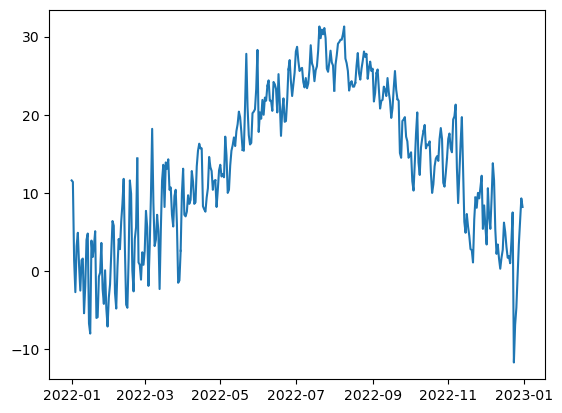

In [62]:
plt.plot(df_temp_sorted['avgTemp'])
plt.show()

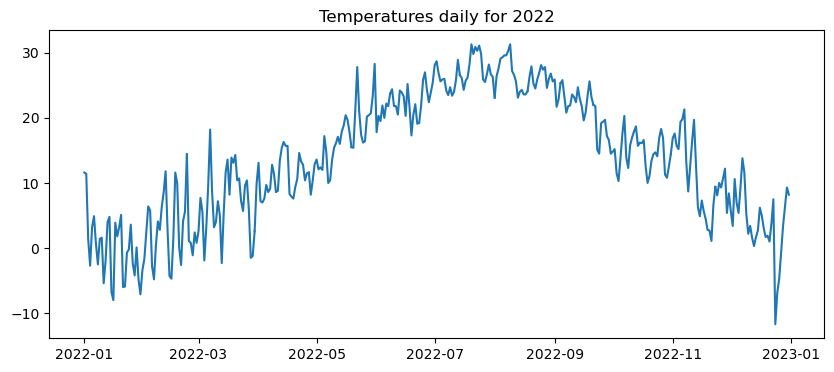

In [63]:
# reminder: figsize=(x-axis size, y-axis size)
plt.figure(figsize=(10,4))
plt.title('Temperatures daily for 2022')
plt.plot(df_temp_sorted['avgTemp'])
plt.show()

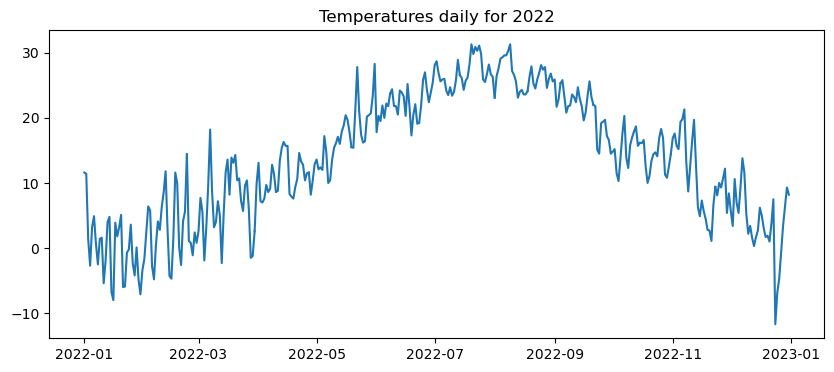

In [64]:
plt.figure(figsize=(10,4))
plt.title('Temperatures daily for 2022')
plt.plot(df_temp_sorted['avgTemp'])
plt.show()

### Aggregate trips 

In [66]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp'],
      dtype='object')

In [67]:
# Groupby the count of the trips 

df_group = df.groupby(['date'])['ride_id'].count().reset_index()
df_group.head()

,date,ride_id
0,2021-12-31,8
1,2022-01-01,212
2,2022-01-02,441
3,2022-01-03,360
4,2022-01-04,352


In [68]:
# experiment with as_index
#df.groupby(['date'], as_index= False)['ride_id'].count()

In [69]:
df_group

,date,ride_id
0,2021-12-31,8
1,2022-01-01,212
2,2022-01-02,441
3,2022-01-03,360
4,2022-01-04,352
...,...,...
361,2022-12-27,287
362,2022-12-28,450
363,2022-12-29,521
364,2022-12-30,640


In [70]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
0,DA32BAC38ADEDABE,classic_bike,2022-04-02 22:40:22.252,2022-04-02 22:55:07.553,N 6 St & Bedford Ave,5379.1,Lewis Ave & Kosciuszko St,4617.01,40.717452,-73.958509,40.692371,-73.937054,member,2022-04-02,7.2
1,0C71CA739AC2CA4F,electric_bike,2022-07-25 16:56:51.390,2022-07-25 17:40:44.833,Centre St & Worth St,5279.03,Flatbush Ave & Ocean Ave,3704.04,40.714948,-74.002345,40.663657,-73.963014,member,2022-07-25,29.8
2,DA81BD3665A5BC22,classic_bike,2022-05-31 17:05:17.396,2022-05-31 17:27:01.624,W 35 St & 9 Ave,6569.09,1 Ave & E 68 St,6822.09,40.754145,-73.996089,40.765005,-73.958185,member,2022-05-31,28.3
3,3DFB1206193EE0CA,electric_bike,2022-09-16 14:26:42.126,2022-09-16 14:31:30.716,2 Ave & E 96 St,7338.02,E 85 St & 3 Ave,7212.05,40.783964,-73.947167,40.778012,-73.954071,member,2022-09-16,19.6
4,B05FE169CA852D6F,electric_bike,2022-03-22 02:32:35.634,2022-03-22 02:56:57.300,E 97 St & 3 Ave,7365.08,Center Blvd & 51 Ave,6179.07,40.785920,-73.948603,40.743366,-73.959607,member,2022-03-22,10.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298383,D60C6F702198D567,classic_bike,2022-12-03 16:33:04.247,2022-12-03 16:35:29.657,Reade St & Broadway,5247.1,Centre St & Chambers St,5207.01,40.714505,-74.005628,40.712733,-74.004607,member,2022-12-03,10.6
298384,A9A926827051FBCB,classic_bike,2022-03-14 12:28:16.726,2022-03-14 13:12:17.328,Broadway & E 14 St,5905.12,Mercer St & Spring St,5532.01,40.734546,-73.990741,40.723627,-73.999496,casual,2022-03-14,5.3
298385,38EE0860B10AF83F,electric_bike,2022-04-20 08:40:01.743,2022-04-20 09:08:57.046,Kent Ave & N 7 St,5489.03,E 56 St & 3 Ave,6691.11,40.720368,-73.961651,40.759345,-73.967597,member,2022-04-20,9.4
298386,0FB68672F0B11B36,classic_bike,2022-05-02 18:17:24.183,2022-05-02 18:21:13.056,Great Jones St,5636.11,4 Ave & E 12 St,5788.15,40.727434,-73.993790,40.732647,-73.990110,member,2022-05-02,12.1


In [71]:
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)
df = df.merge(df_group, on = "date", how = 'outer', indicator = True)
print(df['_merge'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2018-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2018-01-02'].shape) # Second check 

df_temp = df.set_index('date')

print(df_temp.columns)

_merge
both          298388
left_only          0
right_only         0
Name: count, dtype: int64
Shape of January 1st is (0, 17)
Shape of January 2nd is (0, 17)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'bike_rides_daily', '_merge'],
      dtype='object')


In [72]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,bike_rides_daily,_merge
0,DDF0C231F17D34FD,electric_bike,2021-12-31 07:05:17.224,2022-01-01 00:58:04.756,Home St & Westchester Ave,8020.01,E 169 St & Webster Ave,8122.04,40.827629,-73.886659,40.834015,-73.908863,member,2021-12-31,NaN,8,both
1,5B1985FF3CF9ECA8,classic_bike,2021-12-31 16:30:27.557,2022-01-01 17:30:24.875,Perry St & Greenwich Ave,5955.12,NaN,NaN,40.735918,-74.000939,NaN,NaN,member,2021-12-31,NaN,8,both
2,2857FA93EC0B580C,classic_bike,2021-12-31 23:42:48.171,2022-01-01 00:29:00.955,Queens Plaza North & Crescent St,6429.01,48 Ave & 5 St,6212.04,40.751102,-73.940737,40.744363,-73.955873,casual,2021-12-31,NaN,8,both
3,43A07A1751AA2C74,electric_bike,2021-12-31 23:35:45.175,2022-01-01 01:31:29.251,Stanton St & Chrystie St,5523.02,Delancey St & Eldridge St,5414.07,40.722293,-73.991475,40.719383,-73.991479,casual,2021-12-31,NaN,8,both
4,00F3D87E63FF4F75,classic_bike,2021-12-31 23:42:51.239,2022-01-01 00:07:32.040,W 10 St & Washington St,5847.06,W 10 St & Washington St,5847.06,40.733424,-74.008515,40.733424,-74.008515,member,2021-12-31,NaN,8,both


In [73]:
# Delete rows with a year 2021
df = df.loc[df['date'].dt.year != 2021]             

In [74]:
# Reset index
df = df.reset_index(drop = True)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,bike_rides_daily,_merge
0,4312823B234B59BE,classic_bike,2022-01-01 15:02:49.389,2022-01-01 15:21:33.638,John St & William St,5065.04,Canal St & Rutgers St,5303.08,40.708621,-74.007222,40.714275,-73.989900,casual,2022-01-01,11.6,212,both
1,8EF3CAF2AB83D79B,classic_bike,2022-01-01 16:37:43.980,2022-01-01 16:51:24.559,Adelphi St & Myrtle Ave,4620.02,Dean St & Franklin Ave,4107.13,40.693083,-73.971789,40.677592,-73.955637,member,2022-01-01,11.6,212,both
2,E635995432E6D5E9,classic_bike,2022-01-01 17:01:09.616,2022-01-01 17:11:18.885,W 15 St & 6 Ave,5989.02,E 7 St & Avenue A,5626.07,40.738046,-73.996430,40.726218,-73.983799,casual,2022-01-01,11.6,212,both
3,3FBA2C5E4092D2FC,classic_bike,2022-01-01 17:16:25.677,2022-01-01 17:26:15.737,Carmine St & 6 Ave,5763.03,Washington Pl & 6 Ave,5838.09,40.730386,-74.002150,40.732241,-74.000264,member,2022-01-01,11.6,212,both
4,60AB4AEBCA910AF4,classic_bike,2022-01-01 03:38:26.654,2022-01-01 03:42:23.647,Greenwich St & Perry St,5922.04,Greenwich St & W Houston St,5730.08,40.734980,-74.006970,40.728846,-74.008591,member,2022-01-01,11.6,212,both


In [75]:
# Re-write data to get the correct version
df.to_csv('ny_city_data.csv')

In [76]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,bike_rides_daily,_merge
0,4312823B234B59BE,classic_bike,2022-01-01 15:02:49.389,2022-01-01 15:21:33.638,John St & William St,5065.04,Canal St & Rutgers St,5303.08,40.708621,-74.007222,40.714275,-73.989900,casual,2022-01-01,11.6,212,both
1,8EF3CAF2AB83D79B,classic_bike,2022-01-01 16:37:43.980,2022-01-01 16:51:24.559,Adelphi St & Myrtle Ave,4620.02,Dean St & Franklin Ave,4107.13,40.693083,-73.971789,40.677592,-73.955637,member,2022-01-01,11.6,212,both
2,E635995432E6D5E9,classic_bike,2022-01-01 17:01:09.616,2022-01-01 17:11:18.885,W 15 St & 6 Ave,5989.02,E 7 St & Avenue A,5626.07,40.738046,-73.996430,40.726218,-73.983799,casual,2022-01-01,11.6,212,both
3,3FBA2C5E4092D2FC,classic_bike,2022-01-01 17:16:25.677,2022-01-01 17:26:15.737,Carmine St & 6 Ave,5763.03,Washington Pl & 6 Ave,5838.09,40.730386,-74.002150,40.732241,-74.000264,member,2022-01-01,11.6,212,both
4,60AB4AEBCA910AF4,classic_bike,2022-01-01 03:38:26.654,2022-01-01 03:42:23.647,Greenwich St & Perry St,5922.04,Greenwich St & W Houston St,5730.08,40.734980,-74.006970,40.728846,-74.008591,member,2022-01-01,11.6,212,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298375,7AFF1B1498BA3C1F,electric_bike,2022-12-31 09:47:37.081,2022-12-31 09:53:11.227,W 54 St & 11 Ave,6955.05,Columbus Ave & W 72 St,7175.05,40.768327,-73.992694,40.777057,-73.978985,member,2022-12-31,8.2,301,both
298376,407FC8B7E041BEE3,classic_bike,2022-12-31 07:53:21.407,2022-12-31 08:07:15.895,E 51 St & 2 Ave,6575.03,W 59 St & 10 Ave,7023.04,40.755293,-73.967641,40.770513,-73.988038,member,2022-12-31,8.2,301,both
298377,6AFE7BAA08A4D978,electric_bike,2022-12-31 07:47:28.317,2022-12-31 07:58:26.972,E 23 St & 1 Ave,5929.01,Hudson St & W 13 St,6115.06,40.736502,-73.978095,40.740057,-74.005274,member,2022-12-31,8.2,301,both
298378,400218C98B177341,electric_bike,2022-12-31 16:23:41.726,2022-12-31 17:16:07.969,FDR Drive & E 35 St,6230.04,6 Ave & W 45 St,6593.15,40.743990,-73.971320,40.756951,-73.982631,casual,2022-12-31,8.2,301,both


In [77]:
df = df.set_index('date')

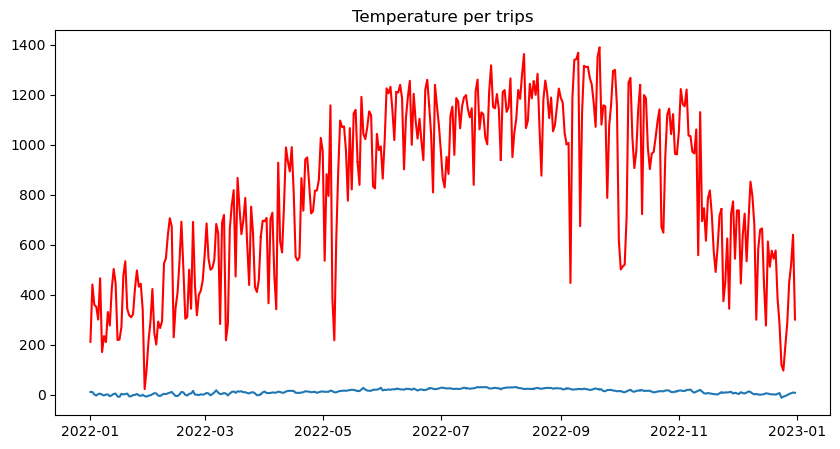

In [78]:
plt.figure(figsize=(10,5))
plt.title('Temperature per trips')
plt.plot(df['avgTemp'])
plt.plot(df['bike_rides_daily'], color = 'red')
plt.show()

### OO approach

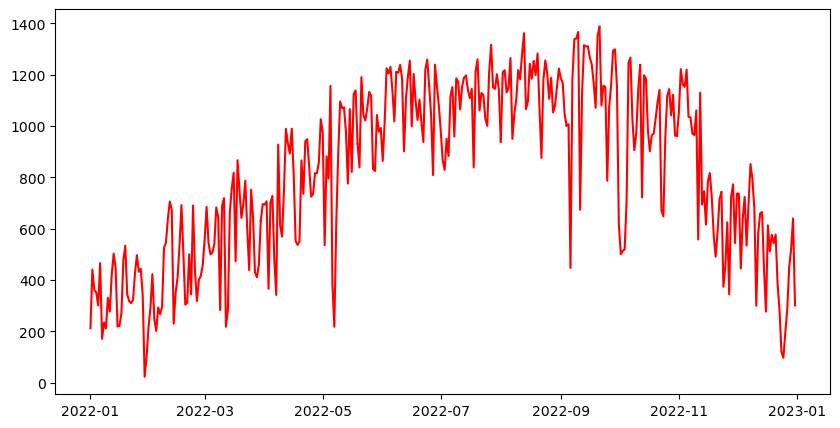

In [80]:
# Create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df['bike_rides_daily'],color = "red")

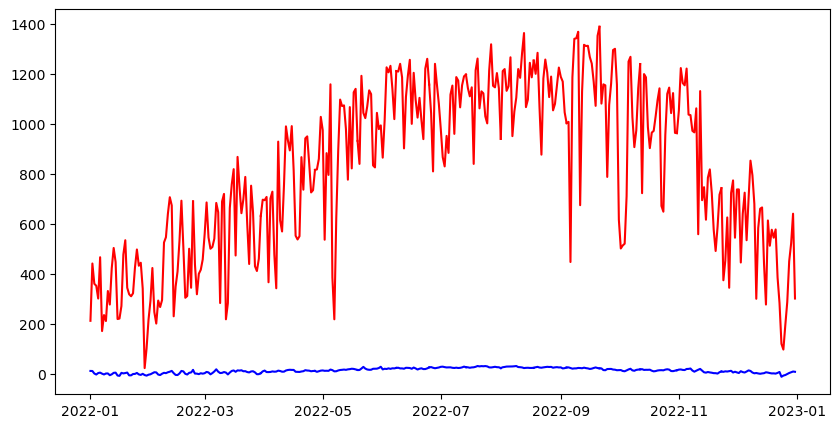

In [81]:
# Create figure and axis objects with subplots()

fig, ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df['bike_rides_daily'],color = "red")
ax.plot(df['avgTemp'], color = 'blue')

In [82]:
y, a = (1,2)
print(y)
print(a)

1
2


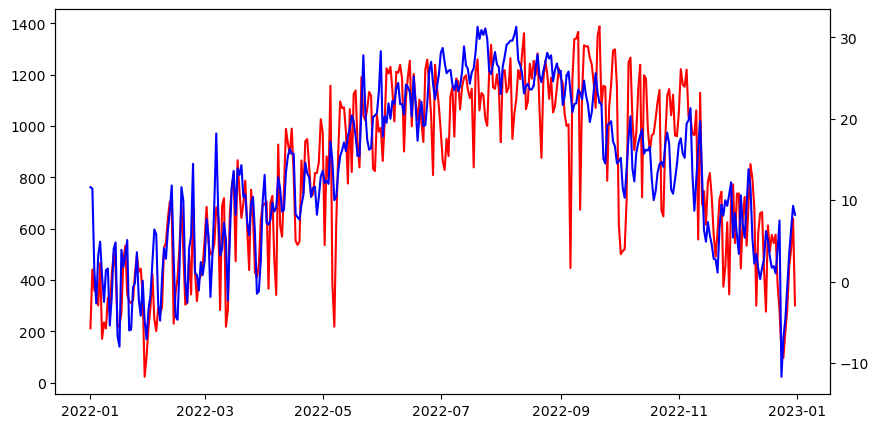

In [83]:
# Create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df['bike_rides_daily'],color = "red")

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatues on the y-axis using second axis object
ax2.plot(df["avgTemp"], color = "blue")
#plt.show()

#### Final dual plot

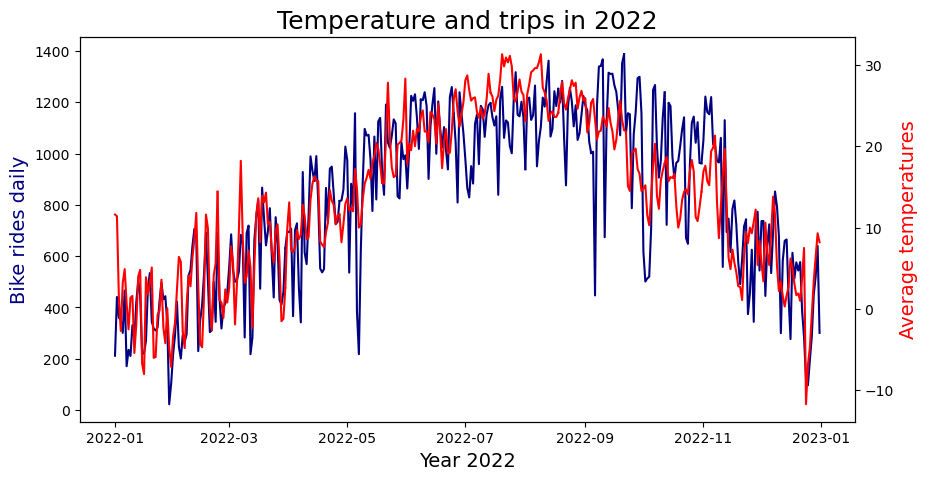

In [85]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df['bike_rides_daily'],color = "navy")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatues on the y-axis using second axis object
ax2.plot(df["avgTemp"], color = "red")
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

### I used the Object Oriented approach for this task. I created 2 axis using "ax2 = ax.twinx()". I also specified certain paramenters such as line color and the font size of the axis. 

In [87]:
# Use specific style of plotting
plt.style.use('ggplot')

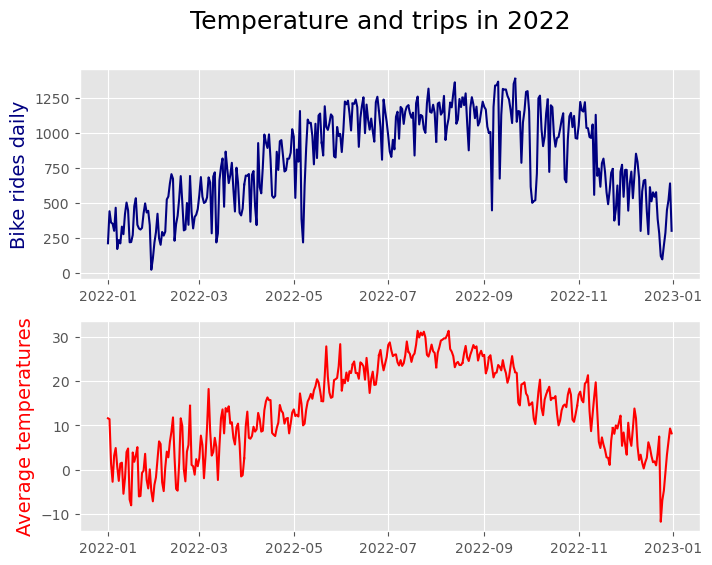

In [88]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(2, figsize =(8, 6))

# Make a plot of the bike rides
ax[0].plot(df['bike_rides_daily'],color = "navy")
ax[0].set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Make a plot with the temperatues on the y-axis using second axis object
ax[1].plot(df_temp["avgTemp"], color = "red")
ax[1].set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.suptitle('Temperature and trips in 2022', fontsize = 18)

plt.show()

In [89]:
# save the plot as a file
fig.savefig('trips_temperatures_dual_line.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')
